# **Heart Disease Prediction using Random Forest**
## This notebook explores hyperparameter tuning in Random Forest for heart disease classification.

Github: https://github.com/TarunReddySalevenkayalla/HYPERPARAMETER-TUNING-IN-RANDOM-FOREST-FOR-HEART-DISEASE-PREDICTION

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [19]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,0.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,2.000000,1.000000


In [21]:
# Checking for missing values
missing_values = df.isnull().sum()

# Display missing values per column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [4]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Chest pain type'] = label_encoder.fit_transform(df['Chest pain type'])
df['FBS over 120'] = label_encoder.fit_transform(df['FBS over 120'])
df['EKG results'] = label_encoder.fit_transform(df['EKG results'])
df['Exercise angina'] = label_encoder.fit_transform(df['Exercise angina'])
df['Slope of ST'] = label_encoder.fit_transform(df['Slope of ST'])
df['Thallium'] = label_encoder.fit_transform(df['Thallium'])
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])  # Convert 'Presence'/'Absence' to 1/0

In [5]:
# Define features and target variable
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Preprocessing Completed!")


Data Preprocessing Completed!


# Exploratory Data Analysis (EDA)

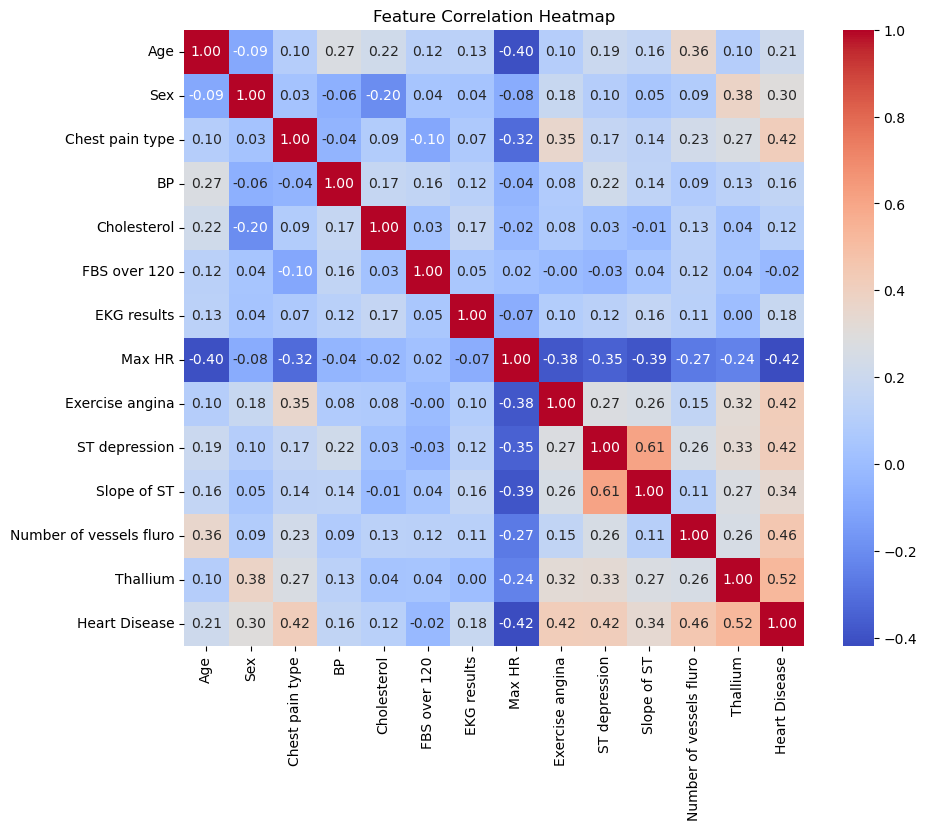

In [10]:
# Visualize correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

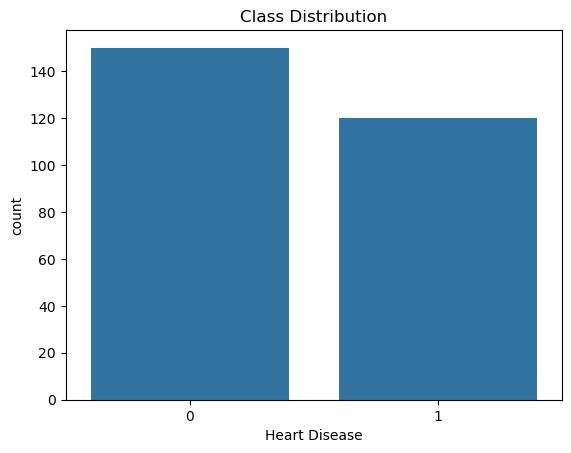

In [11]:
# Check class distribution
sns.countplot(x=df['Heart Disease'])
plt.title("Class Distribution")
plt.show()

In [12]:
# Train a basic Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Predictions
y_pred = rf.predict(X_test)

In [14]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2']
}

Accuracy: 0.7592592592592593
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54



In [15]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [16]:
# Best Parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


In [17]:
# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned Model Classification Report:\n", classification_report(y_test, y_pred_best))

Tuned Model Accuracy: 0.7777777777777778
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.76      0.62      0.68        21

    accuracy                           0.78        54
   macro avg       0.77      0.75      0.76        54
weighted avg       0.78      0.78      0.77        54

